## Подключение библиотек

In [29]:
import numpy as np
import matplotlib.pyplot as plt

## Определение функций f1(x) и f2(x)

In [30]:
def f1(x):
    return np.exp(np.cos(x))

def f2(x):
    return np.abs(x * np.abs(x) - 1)

## Генерация равномерно распределенных узлов на отрезке [a, b]

In [31]:
def equidistant_nodes(a, b, n):
    return np.linspace(a, b, n)

## Генерация узлов Чебышёва на отрезке [a, b]

In [32]:
def chebyshev_nodes(a, b, n):
    nodes = [(a + b) / 2 + (b - a) / 2 * np.cos((2 * i - 1) * np.pi / (2 * n)) for i in range(1, n + 1)]
    return np.array(nodes)

## Вычисление коэффициентов интерполяционного многочлена Ньютона

In [33]:
def compute_newton_coefficients(x, f):
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = f(x)

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i + 1, j - 1] - F[i, j - 1]) / (x[i + j] - x[i])

    return F[0]

## Вычисление значения интерполяционного многочлена Ньютона в точке x

In [34]:
def evaluate_newton_polynomial(x, nodes, coefficients):
    n = len(nodes)
    p = coefficients[-1]
    for i in range(n - 2, -1, -1):
        p = p * (x - nodes[i]) + coefficients[i]
    return p

## Вычисление максимальной погрешности интерполяции

In [35]:
def max_interpolation_error(f, nodes, coefficients, a, b, num_points=1000):
    x_values = np.linspace(a, b, num_points)
    y_values = f(x_values)
    interpolated_values = evaluate_newton_polynomial(x_values, nodes, coefficients)
    errors = np.abs(interpolated_values - y_values)
    return np.max(errors)

## Построение графика интерполяции с узлами равномерно распределенными и с узлами Чебышёва

In [36]:
def plot_interpolation_both(f, equidistant_nodes, equidistant_coefficients, chebyshev_nodes, chebyshev_coefficients, a, b, label):
    x_values = np.linspace(a, b, 1000)
    y_values = f(x_values)
    interpolated_values_equal = evaluate_newton_polynomial(x_values, equidistant_nodes, equidistant_coefficients)
    interpolated_values_chebyshev = evaluate_newton_polynomial(x_values, chebyshev_nodes, chebyshev_coefficients)

    plt.plot(x_values, y_values, label="Original function")
    plt.plot(x_values, interpolated_values_equal, label="Equidistant nodes")
    plt.plot(x_values, interpolated_values_chebyshev, label="Chebyshev nodes")
    plt.scatter(equidistant_nodes, f(equidistant_nodes), color='red', label='Interpolation nodes (equidistant)')
    plt.scatter(chebyshev_nodes, f(chebyshev_nodes), color='green', label='Interpolation nodes (Chebyshev)')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolation')
    plt.grid(True)
    plt.show()

## Определение интервала

In [37]:
a, b = -3, 3

## Задание количества узлов интерполяции для каждой функции

In [38]:
n_values = [3, 10, 20]

## Интерполяция для обеих функций с использованием равномерных и Чебышёвских узлов

Function: f1(x) = e^(cos(x))

Interpolation with 3 nodes
Interpolation error for equidistant nodes: 1.0856912612358456
Interpolation error for Chebyshev nodes: 0.881306319901157


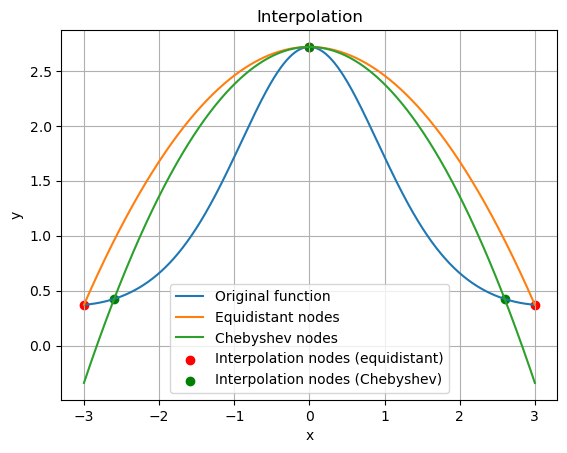

Interpolation with 10 nodes
Interpolation error for equidistant nodes: 0.12467177450408545
Interpolation error for Chebyshev nodes: 0.03185072666159838


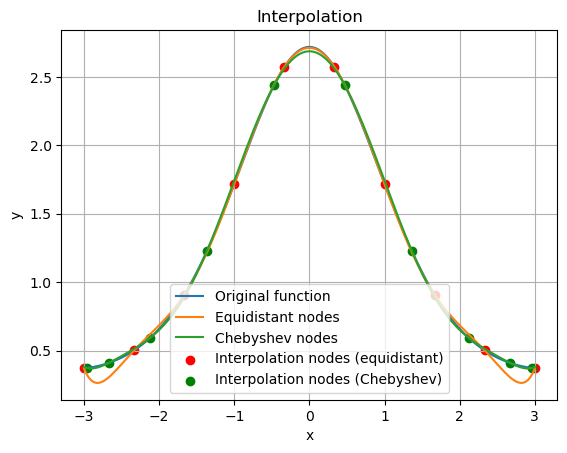

Interpolation with 20 nodes
Interpolation error for equidistant nodes: 0.006595995729212822
Interpolation error for Chebyshev nodes: 2.858964318086521e-05


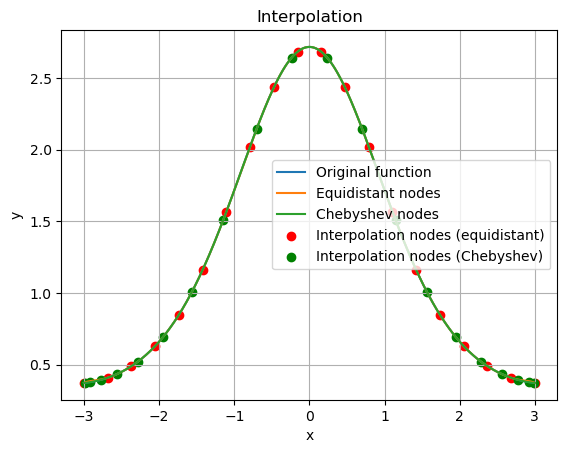

Function: f2(x) = | x * |x| - 1 |

Interpolation with 3 nodes
Interpolation error for equidistant nodes: 1.5555555555555554
Interpolation error for Chebyshev nodes: 1.466951672392101


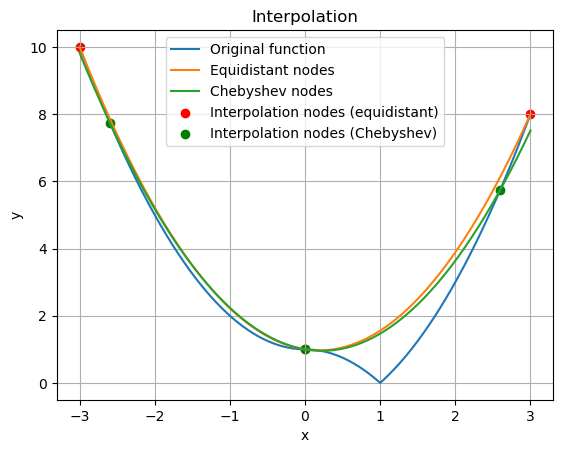

Interpolation with 10 nodes
Interpolation error for equidistant nodes: 3.285829471033151
Interpolation error for Chebyshev nodes: 0.5883459442500385


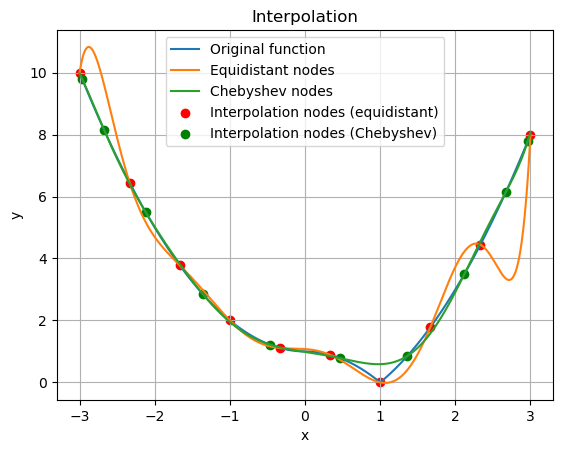

Interpolation with 20 nodes
Interpolation error for equidistant nodes: 58.89960833973575
Interpolation error for Chebyshev nodes: 0.23522633109793922


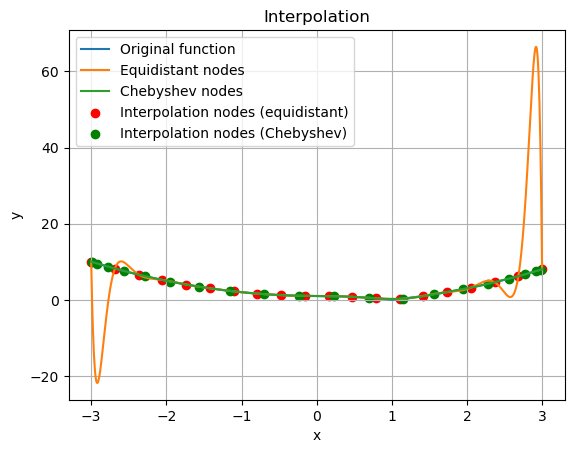

In [39]:
for f, label in zip([f1, f2], ["f1(x) = e^(cos(x))", "f2(x) = | x * |x| - 1 |"]):
    print("Function:", label)
    print()

    for n in n_values:
        print(f"Interpolation with {n} nodes")

        # Равномерно распределенные узлы
        equidistant_x = equidistant_nodes(a, b, n)
        equidistant_coefficients = compute_newton_coefficients(equidistant_x, f)
        equidistant_error = max_interpolation_error(f, equidistant_x, equidistant_coefficients, a, b)
        print("Interpolation error for equidistant nodes:", equidistant_error)

        # Узлы Чебышёва
        chebyshev_x = chebyshev_nodes(a, b, n)
        chebyshev_coefficients = compute_newton_coefficients(chebyshev_x, f)
        chebyshev_error = max_interpolation_error(f, chebyshev_x, chebyshev_coefficients, a, b)
        print("Interpolation error for Chebyshev nodes:", chebyshev_error)

        plot_interpolation_both(f, equidistant_x, equidistant_coefficients, chebyshev_x, chebyshev_coefficients, a, b, "Interpolation")